# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將資料依照歲數, 將 20 到 70 歲切成11個區間? (In[4], Hint : 使用 numpy.linspace),  
  送入繪圖前的除了排序外, 還要注意什麼? (In[5])
- 如何調整對應資料, 以繪製長條圖(bar chart)? (In[7])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot') # seaborn or ggplot

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [4]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

#自 20 到 70 歲，切 11 個點 (得到 10 組)
"""
Your Code Here
"""
bin_cut = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
label_list = ['20-25', '26-30', '31-35', '36-40', '41-45',  '46-50', '51-55', '56-60', '61-65', '66-70']
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut, labels = label_list, include_lowest = True)

# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

36-40    42868
41-45    41406
31-35    39440
46-50    35135
51-55    34942
56-60    33120
26-30    32862
61-65    27476
20-25    12159
66-70     8103
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,26-30
1,0,16765,45.931507,46-50
2,0,19046,52.180822,51-55
3,0,19005,52.068493,51-55
4,0,19932,54.608219,51-55


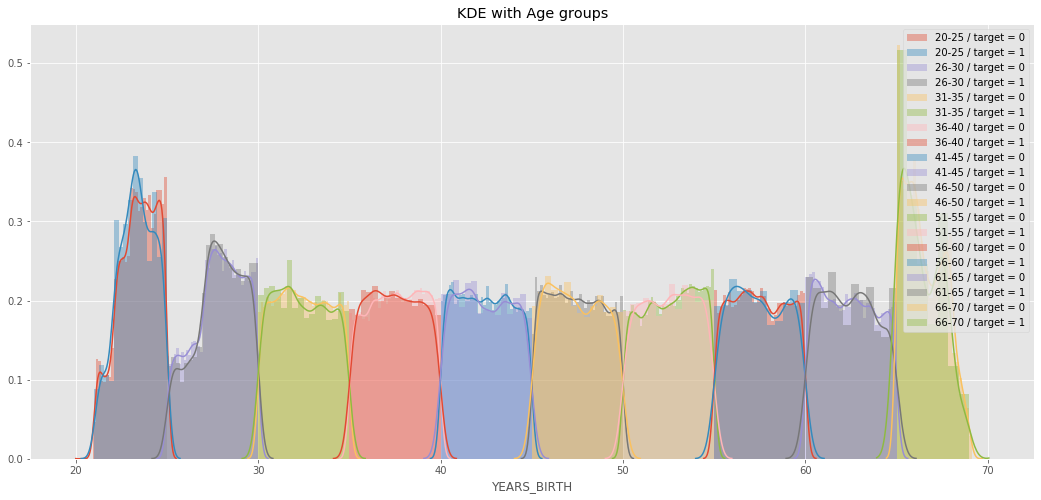

In [5]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group_sorted = ['20-25', '26-30', '31-35', '36-40', '41-45',  '46-50', '51-55', '56-60', '61-65', '66-70']

plt.figure(figsize=(18,8))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], \
                 label = '{} / {}'.format(str(year_group_sorted[i]), 'target = 0'))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], \
                 label = '{} / {}'.format(str(year_group_sorted[i]), 'target = 1'))
plt.title('KDE with Age groups')
plt.legend()
plt.show()

In [6]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
20-25,0.123036,8532.795625,23.377522
26-30,0.111436,10155.219250,27.822518
31-35,0.102814,11854.848377,32.479037
36-40,0.089414,13707.908253,37.555913
41-45,0.078491,15497.661233,42.459346
46-50,0.074171,17323.900441,47.462741
51-55,0.066968,19196.494791,52.593136
56-60,0.055314,20984.262742,57.491131
61-65,0.052737,22780.547460,62.412459


In [7]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的總和
age_data.groupby('YEARS_BINNED').sum()

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
20-25,1496,103750262,2.842473e+05
26-30,3662,333720815,9.143036e+05
31-35,4055,467555220,1.280973e+06
36-40,3833,587630611,1.609947e+06
41-45,3250,641696161,1.758072e+06
46-50,2606,608675242,1.667603e+06
51-55,2340,670763921,1.837709e+06
56-60,1832,694998782,1.904106e+06
61-65,1449,625918322,1.714845e+06


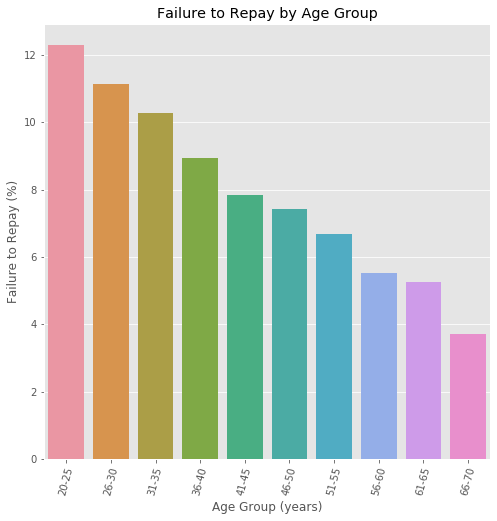

In [8]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_groups.index
py = age_groups['TARGET'] * 100
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');